## Mastitis Disease Detection
##### Mastitis disease detection using Keras and OpenCV is an innovative approach that leverages the power of deep learning and computer vision to identify and diagnose mastitis, a common and costly ailment affecting dairy cows.



###### Author: Sivaprathish sivamoorthy
###### email: sivaprathishsiva@gmail.com

In [213]:
#import the library of tensorflow ,Keras,opencv,numpy,pyplot
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model
from IPython.display import clear_output

In [214]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [215]:
tf.config.list_physical_devices('GPU')

[]

In [216]:
#directory
data_dir = 'data' 
os.listdir(data_dir)

['mastitis', 'normal teats']

In [217]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [218]:
#filter the image only and delete other type of file
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            

### load the data

In [219]:
# load the Data
data = tf.keras.utils.image_dataset_from_directory('data')

Found 203 files belonging to 2 classes.


In [220]:
data_iterator = data.as_numpy_iterator()

In [221]:
batch = data_iterator.next()

# class 0= mastitis
# class 1 = normal

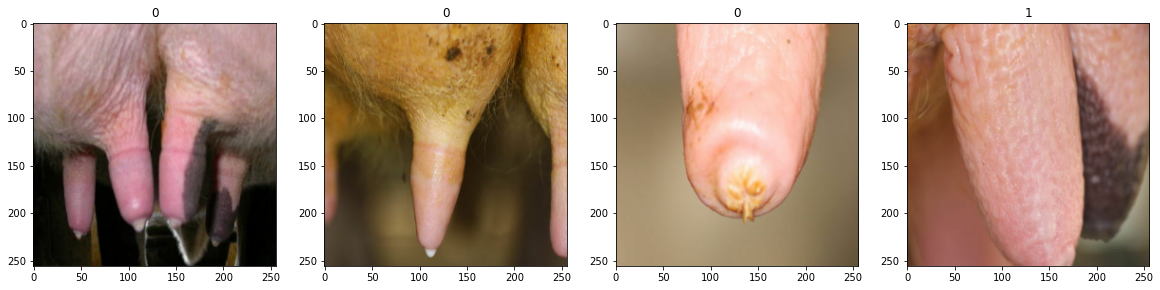

In [222]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [223]:
batch[0].shape


(32, 256, 256, 3)

In [224]:
scaled = batch[0]/255
scaled.max()

1.0

In [225]:
# preprocess the data
# scale data
data = data.map(lambda x,y: (x/255, y))

In [226]:
data

<MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### split Data

In [227]:
#split data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [228]:
train_size

4

In [229]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

### Build the Model

In [230]:

train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [231]:
model = Sequential()

In [232]:
# using 5  multiple layers in keras (Con2D, Maxpooling2D,Flatten,Dense)
# 5 layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [233]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [234]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 30, 30, 128)     

#### Train the Model

In [235]:
logdir='log'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [236]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 11s 2s/step - loss: 1.9572 - accuracy: 0.5391 - val_loss: 0.5654 - val_accuracy: 0.8281
Epoch 2/20
4/4 [==============================] - 9s 2s/step - loss: 0.5478 - accuracy: 0.8125 - val_loss: 0.4787 - val_accuracy: 0.8125
Epoch 3/20
4/4 [==============================] - 9s 2s/step - loss: 0.4267 - accuracy: 0.8516 - val_loss: 0.4684 - val_accuracy: 0.8281
Epoch 4/20
4/4 [==============================] - 10s 3s/step - loss: 0.4546 - accuracy: 0.8359 - val_loss: 0.4867 - val_accuracy: 0.7812
Epoch 5/20
4/4 [==============================] - 11s 3s/step - loss: 0.3956 - accuracy: 0.8594 - val_loss: 0.4090 - val_accuracy: 0.8281
Epoch 6/20
4/4 [==============================] - 9s 2s/step - loss: 0.4242 - accuracy: 0.8438 - val_loss: 0.3127 - val_accuracy: 0.8906
Epoch 7/20
4/4 [==============================] - 10s 3s/step - loss: 0.3204 - accuracy: 0.8750 - val_loss: 0.3349 - val_accuracy: 0.8594
Epoch 8/20
4/4 [=====================

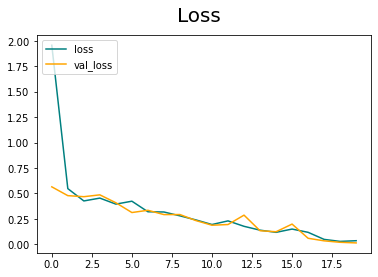

In [249]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

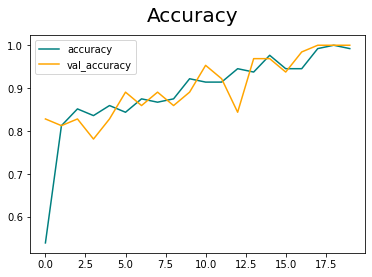

In [250]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [251]:
#evaluate
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [252]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 183ms/step


In [253]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


## Test the Model

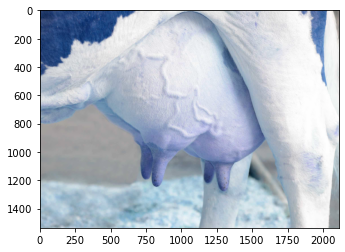

In [259]:
# Test
# load image using opencv
img = cv2.imread('teat_nor.jpg')
plt.imshow(img)
plt.show()

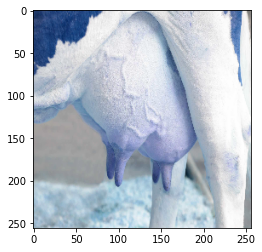

In [260]:
# resize it
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [261]:
#predict 
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 76ms/step


In [262]:
yhat

array([[0.8553804]], dtype=float32)

In [263]:
#check the value for posssibility for disease
if yhat > 0.5: 
    print(f'Predicted Normal')
else:
    print(f'Predicted  Mastitis')

Predicted Normal


In [264]:

#saving the file
model.save('imageclassifier.h5')
new_model = load_model('imageclassifier.h5')
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 129ms/step


array([[0.8553804]], dtype=float32)

In [248]:
#live
model = load_model('imageclassifier.h5')